In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r"C:\Users\HP\Desktop\2nd sem\project\house price prediction\with map\1\train.csv")

In [3]:
df

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5
...,...,...,...,...,...,...,...,...,...,...,...,...
29446,Owner,0,0,3,BHK,2500.000000,1,1,"Shamshabad Road,Agra",27.140626,78.043277,45.0
29447,Owner,0,0,2,BHK,769.230769,1,1,"E3-108, Lake View Recidency,,Vapi",39.945409,-86.150721,16.0
29448,Dealer,0,0,2,BHK,1022.641509,1,1,"Ajmer Road,Jaipur",26.928785,75.828002,27.1
29449,Owner,0,0,2,BHK,927.079009,1,1,"Sholinganallur,Chennai",12.900150,80.227910,67.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29451 entries, 0 to 29450
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   POSTED_BY              29451 non-null  object 
 1   UNDER_CONSTRUCTION     29451 non-null  int64  
 2   RERA                   29451 non-null  int64  
 3   BHK_NO.                29451 non-null  int64  
 4   BHK_OR_RK              29451 non-null  object 
 5   SQUARE_FT              29451 non-null  float64
 6   READY_TO_MOVE          29451 non-null  int64  
 7   RESALE                 29451 non-null  int64  
 8   ADDRESS                29451 non-null  object 
 9   LONGITUDE              29451 non-null  float64
 10  LATITUDE               29451 non-null  float64
 11  TARGET(PRICE_IN_LACS)  29451 non-null  float64
dtypes: float64(4), int64(5), object(3)
memory usage: 2.7+ MB


In [5]:
df["city"]=df["ADDRESS"].apply(lambda x:x.split(",")[-1])

In [6]:
df["city"]

0        Bangalore
1           Mysore
2        Bangalore
3        Ghaziabad
4          Kolkata
           ...    
29446         Agra
29447         Vapi
29448       Jaipur
29449      Chennai
29450       Jaipur
Name: city, Length: 29451, dtype: object

In [7]:
city_centers=pd.read_csv(r"C:\Users\HP\Desktop\2nd sem\project\house price prediction\with map\country-cities-data.csv")

In [8]:
city_centers

,city,country,pop2023,latitude,longitude
0,Barsi,India,110983,18.2345,75.6927
1,Navadwip,India,111123,23.4067,88.3686
2,Achalpur,India,111278,21.2567,77.5101
3,Ashoknagar Kalyangarh,India,111475,22.8642,88.6370
4,Chhatarpur,India,111594,24.9177,79.5887
...,...,...,...,...,...
395,Chennai,India,4328063,13.0878,80.2785
396,Kolkata,India,4631392,22.5626,88.3630
397,Bengaluru,India,5104047,12.9719,77.5937
398,Delhi,India,10927986,28.6520,77.2315


In [9]:
city_centers.drop(["country"], axis=1, inplace=True)


In [10]:
city_centers=city_centers.rename(columns={"latitude":"city_lattitude","longitude":"city_longitude"})

In [11]:
city_centers

,city,pop2023,city_lattitude,city_longitude
0,Barsi,110983,18.2345,75.6927
1,Navadwip,111123,23.4067,88.3686
2,Achalpur,111278,21.2567,77.5101
3,Ashoknagar Kalyangarh,111475,22.8642,88.6370
4,Chhatarpur,111594,24.9177,79.5887
...,...,...,...,...
395,Chennai,4328063,13.0878,80.2785
396,Kolkata,4631392,22.5626,88.3630
397,Bengaluru,5104047,12.9719,77.5937
398,Delhi,10927986,28.6520,77.2315


In [12]:
merged_df = df.merge(city_centers, on='city', how='inner')

In [13]:
merged_df

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),city,pop2023,city_lattitude,city_longitude
0,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0,Mysore,868313,12.2979,76.6393
1,Owner,0,0,3,BHK,1655.878368,1,1,"Yadavagiri,Mysore",12.326657,76.637965,110.0,Mysore,868313,12.2979,76.6393
2,Dealer,0,0,2,BHK,1363.109049,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,47.0,Mysore,868313,12.2979,76.6393
3,Dealer,0,0,3,BHK,1355.199135,1,1,"Srirampura,Mysore",12.265026,76.624690,75.2,Mysore,868313,12.2979,76.6393
4,Builder,0,0,2,BHK,1179.813594,1,0,"Vijaynagar,Mysore",12.327102,76.586441,51.9,Mysore,868313,12.2979,76.6393
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21653,Owner,0,0,2,BHK,1100.352113,1,1,"Laxmi Nagar Gondia,Gondia",21.450000,80.200000,25.0,Gondia,124897,21.4603,80.1920
21654,Dealer,0,0,3,BHK,1177.005226,1,1,"Arni Road, Velapadi Kosapet,Vellore",12.910441,79.134566,51.8,Vellore,177081,12.9184,79.1326
21655,Builder,0,0,3,BHK,1526.336025,1,0,"Anand Nagar,Bharatpur",27.200946,77.524111,39.7,Bharatpur,229384,27.2173,77.4901
21656,Owner,0,0,1,BHK,499.049430,1,1,"Madhapar,Bhuj",23.230130,69.710820,10.5,Bhuj,133459,23.2540,69.6693


In [14]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21658 entries, 0 to 21657
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   POSTED_BY              21658 non-null  object 
 1   UNDER_CONSTRUCTION     21658 non-null  int64  
 2   RERA                   21658 non-null  int64  
 3   BHK_NO.                21658 non-null  int64  
 4   BHK_OR_RK              21658 non-null  object 
 5   SQUARE_FT              21658 non-null  float64
 6   READY_TO_MOVE          21658 non-null  int64  
 7   RESALE                 21658 non-null  int64  
 8   ADDRESS                21658 non-null  object 
 9   LONGITUDE              21658 non-null  float64
 10  LATITUDE               21658 non-null  float64
 11  TARGET(PRICE_IN_LACS)  21658 non-null  float64
 12  city                   21658 non-null  object 
 13  pop2023                21658 non-null  int64  
 14  city_lattitude         21658 non-null  float64
 15  ci

In [15]:
from math import radians
from math import radians, sin, cos, sqrt, atan2
def haversine_distance(lat1, lon1, lat2, lon2):
    # Convert latitude and longitude from degrees to radians
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])

    # Haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    radius_of_earth = 6371  # Radius of Earth in kilometers
    distance = radius_of_earth * c

    return distance



In [16]:
# Calculate the distance from property to city center
merged_df['DISTANCE_TO_CITY_CENTER'] = merged_df.apply(lambda row: haversine_distance(row['LATITUDE'], row['LONGITUDE'], row['city_lattitude'], row['city_longitude']), axis=1)


In [17]:

# Display the resulting DataFrame
merged_df

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),city,pop2023,city_lattitude,city_longitude,DISTANCE_TO_CITY_CENTER
0,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0,Mysore,868313,12.2979,76.6393,8033.748666
1,Owner,0,0,3,BHK,1655.878368,1,1,"Yadavagiri,Mysore",12.326657,76.637965,110.0,Mysore,868313,12.2979,76.6393,8032.229431
2,Dealer,0,0,2,BHK,1363.109049,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,47.0,Mysore,868313,12.2979,76.6393,8033.748666
3,Dealer,0,0,3,BHK,1355.199135,1,1,"Srirampura,Mysore",12.265026,76.624690,75.2,Mysore,868313,12.2979,76.6393,8033.133200
4,Builder,0,0,2,BHK,1179.813594,1,0,"Vijaynagar,Mysore",12.327102,76.586441,51.9,Mysore,868313,12.2979,76.6393,8030.036745
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21653,Owner,0,0,2,BHK,1100.352113,1,1,"Laxmi Nagar Gondia,Gondia",21.450000,80.200000,25.0,Gondia,124897,21.4603,80.1920,7085.646815
21654,Dealer,0,0,3,BHK,1177.005226,1,1,"Arni Road, Velapadi Kosapet,Vellore",12.910441,79.134566,51.8,Vellore,177081,12.9184,79.1326,8108.816036
21655,Builder,0,0,3,BHK,1526.336025,1,0,"Anand Nagar,Bharatpur",27.200946,77.524111,39.7,Bharatpur,229384,27.2173,77.4901,6148.857779
21656,Owner,0,0,1,BHK,499.049430,1,1,"Madhapar,Bhuj",23.230130,69.710820,10.5,Bhuj,133459,23.2540,69.6693,5988.176664


In [18]:
merged_df['BHK_OR_RK']= merged_df['BHK_OR_RK'].replace({'BHK': 1, 'RK': 0}) 



In [19]:
# Replace values in the DataFram

In [20]:
merged_df

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),city,pop2023,city_lattitude,city_longitude,DISTANCE_TO_CITY_CENTER
0,Dealer,0,0,2,1,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0,Mysore,868313,12.2979,76.6393,8033.748666
1,Owner,0,0,3,1,1655.878368,1,1,"Yadavagiri,Mysore",12.326657,76.637965,110.0,Mysore,868313,12.2979,76.6393,8032.229431
2,Dealer,0,0,2,1,1363.109049,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,47.0,Mysore,868313,12.2979,76.6393,8033.748666
3,Dealer,0,0,3,1,1355.199135,1,1,"Srirampura,Mysore",12.265026,76.624690,75.2,Mysore,868313,12.2979,76.6393,8033.133200
4,Builder,0,0,2,1,1179.813594,1,0,"Vijaynagar,Mysore",12.327102,76.586441,51.9,Mysore,868313,12.2979,76.6393,8030.036745
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21653,Owner,0,0,2,1,1100.352113,1,1,"Laxmi Nagar Gondia,Gondia",21.450000,80.200000,25.0,Gondia,124897,21.4603,80.1920,7085.646815
21654,Dealer,0,0,3,1,1177.005226,1,1,"Arni Road, Velapadi Kosapet,Vellore",12.910441,79.134566,51.8,Vellore,177081,12.9184,79.1326,8108.816036
21655,Builder,0,0,3,1,1526.336025,1,0,"Anand Nagar,Bharatpur",27.200946,77.524111,39.7,Bharatpur,229384,27.2173,77.4901,6148.857779
21656,Owner,0,0,1,1,499.049430,1,1,"Madhapar,Bhuj",23.230130,69.710820,10.5,Bhuj,133459,23.2540,69.6693,5988.176664


In [21]:
merged_df['Price_per_sqft'] = merged_df['TARGET(PRICE_IN_LACS)'] /merged_df['SQUARE_FT']

In [22]:
merged_df.city=merged_df.city.apply(lambda x:x.strip())
location_stats=merged_df.groupby('city')['city'].agg('count')
location_stats


city
Agartala           1
Agra              83
Ajmer             21
Akola              9
Aligarh           22
                ... 
Visakhapatnam    179
Vizianagaram      18
Warangal           4
Wardha            10
Yavatmal           2
Name: city, Length: 161, dtype: int64

In [23]:
len(location_stats[location_stats<=10])

83

In [24]:
len(merged_df.city.unique())

161

In [25]:
 merged_df['BHK_NO.'].unique()

array([ 2,  3,  1,  4,  5,  6,  7, 15,  8,  9, 17, 20, 12, 11],
      dtype=int64)

In [26]:
merged_df[merged_df['SQUARE_FT'] / merged_df['BHK_NO.'] < 20].head()


,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),city,pop2023,city_lattitude,city_longitude,DISTANCE_TO_CITY_CENTER,Price_per_sqft
16940,Owner,0,0,4,1,45.000191,1,1,"Swarn Jayanti Vihar,Kanpur",26.472500,80.331110,23.5,Kanpur,2823249,26.4652,80.3497,6464.017257,0.010000
18656,Owner,0,0,1,1,10.000000,1,1,"Punagam,Surat",21.216630,72.899374,8.0,Surat,2894504,21.1959,72.8302,6554.723491,0.010402
19063,Owner,0,0,2,1,3.985594,1,1,"Amlidih,Raipur",21.213822,81.676956,24.9,Raipur,679995,21.2333,81.6333,7211.210936,0.041637
19213,Owner,0,0,2,1,5.000000,1,1,"Sector-29 Chandigarh,Chandigarh",30.755000,76.777256,45.0,Chandigarh,960787,30.7363,76.7884,5632.241245,0.040908
21060,Owner,0,0,1,1,10.979906,1,1,"Ganesh Colony,Jalgaon",21.047939,75.770559,27.3,Jalgaon,429298,21.0029,75.5660,6813.394215,0.019497


In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
merged_df['Weighted_Population'] = scaler.fit_transform(merged_df[['pop2023']])


In [28]:
merged_df.corr()

C:\Users\HP\AppData\Local\Temp\ipykernel_12792\4191659586.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  merged_df.corr()


,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),pop2023,city_lattitude,city_longitude,DISTANCE_TO_CITY_CENTER,Price_per_sqft,Weighted_Population
UNDER_CONSTRUCTION,1.000000,0.346190,-0.032091,-0.023475,0.008156,-1.000000,-0.326890,-0.023885,0.001818,0.059890,0.060659,-0.008153,0.017385,0.009580,0.049203,0.060659
RERA,0.346190,1.000000,0.025674,-0.006094,0.005316,-0.346190,-0.250426,0.128033,-0.084331,0.068075,0.006054,0.155271,-0.202080,-0.214263,0.057451,0.006054
BHK_NO.,-0.032091,0.025674,1.000000,0.053069,0.030513,0.032091,-0.005083,0.167235,0.048939,0.124108,-0.093956,0.176244,0.093627,-0.107892,0.100607,-0.093956
BHK_OR_RK,-0.023475,-0.006094,0.053069,1.000000,0.001858,0.023475,0.035015,-0.001325,-0.000002,0.005328,0.024130,-0.009409,-0.004840,0.006663,0.004837,0.024130
SQUARE_FT,0.008156,0.005316,0.030513,0.001858,1.000000,-0.008156,-0.049550,-0.005881,0.001777,0.211277,-0.002017,-0.007636,0.004016,0.006514,0.179779,-0.002017
READY_TO_MOVE,-1.000000,-0.346190,0.032091,0.023475,-0.008156,1.000000,0.326890,0.023885,-0.001818,-0.059890,-0.060659,0.008153,-0.017385,-0.009580,-0.049203,-0.060659
RESALE,-0.326890,-0.250426,-0.005083,0.035015,-0.049550,0.326890,1.000000,0.039717,0.012189,-0.226779,-0.034215,0.043427,0.005685,-0.038144,-0.192394,-0.034215
LONGITUDE,-0.023885,0.128033,0.167235,-0.001325,-0.005881,0.023885,0.039717,1.000000,-0.161661,-0.028317,-0.330469,0.871539,0.018945,-0.658001,-0.024542,-0.330469
LATITUDE,0.001818,-0.084331,0.048939,-0.000002,0.001777,-0.001818,0.012189,-0.161661,1.000000,-0.020167,-0.067600,0.017102,0.390897,-0.164527,-0.015265,-0.067600
TARGET(PRICE_IN_LACS),0.059890,0.068075,0.124108,0.005328,0.211277,-0.059890,-0.226779,-0.028317,-0.020167,1.000000,0.052323,-0.014461,-0.026049,-0.002179,0.850716,0.052323


In [29]:
correlation_matrix = merged_df.corr()

C:\Users\HP\AppData\Local\Temp\ipykernel_12792\2740125995.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = merged_df.corr()


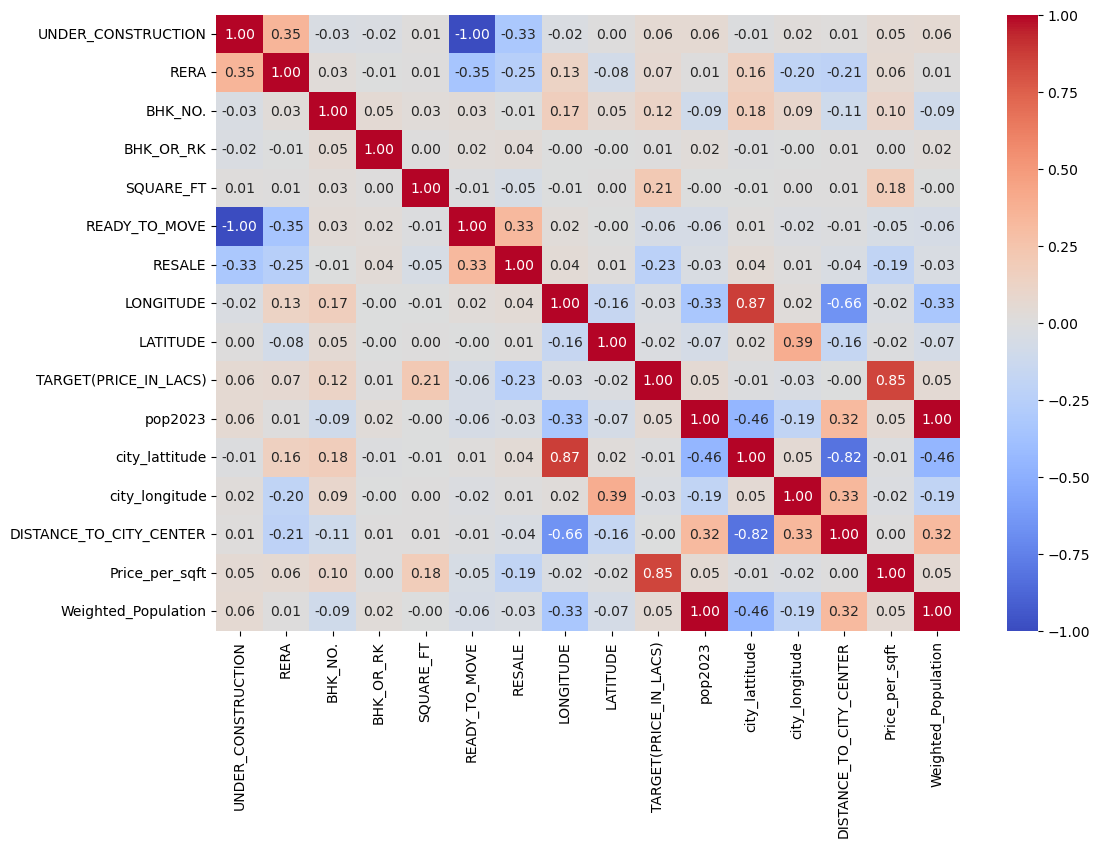

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()


In [31]:
# Sort variables by their correlation with 'TARGET(PRICE_IN_LACS)'
correlation_with_target = correlation_matrix['TARGET(PRICE_IN_LACS)'].sort_values(ascending=False)

# Display the sorted correlation values
print(correlation_with_target)


TARGET(PRICE_IN_LACS)      1.000000
Price_per_sqft             0.850716
SQUARE_FT                  0.211277
BHK_NO.                    0.124108
RERA                       0.068075
UNDER_CONSTRUCTION         0.059890
Weighted_Population        0.052323
pop2023                    0.052323
BHK_OR_RK                  0.005328
DISTANCE_TO_CITY_CENTER   -0.002179
city_lattitude            -0.014461
LATITUDE                  -0.020167
city_longitude            -0.026049
LONGITUDE                 -0.028317
READY_TO_MOVE             -0.059890
RESALE                    -0.226779
Name: TARGET(PRICE_IN_LACS), dtype: float64


In [32]:
# Find the area with the highest population
area_with_highest_population = merged_df[merged_df['pop2023'] == merged_df['pop2023'].max()]


In [33]:
area_with_highest_population

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),city,pop2023,city_lattitude,city_longitude,DISTANCE_TO_CITY_CENTER,Price_per_sqft,Weighted_Population
9380,Dealer,0,0,1,1,630.000630,1,1,"Bandra (West),Mumbai",19.054440,72.840560,300.0,Mumbai,12691836,19.0728,72.8826,6841.122764,0.717667,2.833842
9381,Dealer,0,1,3,1,1274.924779,1,1,"Marol,Mumbai",22.803593,83.755013,250.0,Mumbai,12691836,19.0728,72.8826,7449.545787,0.277759,2.833842
9382,Dealer,0,1,3,1,1038.883942,1,1,"Powai,Mumbai",19.120000,72.910000,280.0,Mumbai,12691836,19.0728,72.8826,6843.101404,0.234182,2.833842
9383,Dealer,0,1,2,1,1004.932182,1,1,"New Panvel,Mumbai",18.966114,73.148278,81.5,Mumbai,12691836,19.0728,72.8826,6860.623046,0.067915,2.833842
9384,Dealer,0,1,2,1,1294.016156,1,1,"4 Bunglows,Mumbai",19.128324,72.825408,330.0,Mumbai,12691836,19.0728,72.8826,6838.181162,0.183185,2.833842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11398,Dealer,0,1,2,1,1261.395562,1,1,"Malad (East),Mumbai",19.175800,72.864300,220.0,Mumbai,12691836,19.0728,72.8826,6838.985666,0.146641,2.833842
11399,Dealer,0,0,2,1,1167.749797,1,1,"Andheri (East),Mumbai",19.114500,72.871200,230.0,Mumbai,12691836,19.0728,72.8826,6841.108868,0.211784,2.833842
11400,Dealer,0,0,2,1,556.818709,1,1,"Dahisar (East),Mumbai",19.256471,72.868815,120.0,Mumbai,12691836,19.0728,72.8826,6836.946867,0.120000,2.833842
11401,Dealer,1,0,1,1,583.022388,0,1,"Mulund (West),Mumbai",19.175900,72.952200,75.0,Mumbai,12691836,19.0728,72.8826,6843.860519,0.156250,2.833842


In [34]:
# Sort the DataFrame by population in descending order
merged_df_sorted = merged_df.sort_values(by='pop2023', ascending=False)


In [35]:
merged_df_sorted 

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),city,pop2023,city_lattitude,city_longitude,DISTANCE_TO_CITY_CENTER,Price_per_sqft,Weighted_Population
10829,Dealer,0,1,3,1,1683.084996,1,1,"Ghatkopar (East),Mumbai",19.078305,72.905931,340.0,Mumbai,12691836,19.0728,72.8826,6844.057924,0.279780,2.833842
10723,Dealer,0,1,3,1,1140.014509,1,1,"Hiranandani Estate,Mumbai",19.255098,72.981527,110.0,Mumbai,12691836,19.0728,72.8826,6843.257375,0.092265,2.833842
10736,Dealer,0,0,1,1,619.988427,1,1,"Bandra (West),Mumbai",19.054440,72.840560,300.0,Mumbai,12691836,19.0728,72.8826,6841.122764,0.244667,2.833842
10735,Dealer,0,1,3,1,2256.843331,1,1,"Shastri Nagar,Mumbai",19.139242,72.828969,620.0,Mumbai,12691836,19.0728,72.8826,6838.067400,0.826832,2.833842
10734,Dealer,1,1,2,1,550.030139,0,1,"Badlapur,Mumbai",18.966670,72.833330,36.5,Mumbai,12691836,19.0728,72.8826,6843.224886,0.028079,2.833842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21565,Dealer,0,0,2,1,1207.547170,1,1,"ARAVLI HEIGHTS,Rewari",28.183330,76.616670,22.4,Rewari,112079,28.1990,76.6183,5947.160637,0.025088,-0.728531
21564,Owner,0,1,3,1,1398.210291,1,1,"Sector - 25,Rewari",28.582887,77.339935,75.0,Rewari,112079,28.1990,76.6183,5985.463809,0.033553,-0.728531
21567,Owner,0,0,3,1,2000.000000,1,1,"sector -10 rewari,Rewari",28.190107,76.641806,61.0,Rewari,112079,28.1990,76.6183,5948.616024,0.058091,-0.728531
21561,Dealer,0,0,3,1,1555.693839,1,1,"ARAVLI HEIGHTS,Rewari",28.183330,76.616670,25.0,Rewari,112079,28.1990,76.6183,5947.160637,0.038580,-0.728531


In [36]:
merged_df=merged_df.rename(columns={"BHK_NO.":"BHK"})

In [37]:
merged_df

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),city,pop2023,city_lattitude,city_longitude,DISTANCE_TO_CITY_CENTER,Price_per_sqft,Weighted_Population
0,Dealer,0,0,2,1,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0,Mysore,868313,12.2979,76.6393,8033.748666,0.039224,-0.514379
1,Owner,0,0,3,1,1655.878368,1,1,"Yadavagiri,Mysore",12.326657,76.637965,110.0,Mysore,868313,12.2979,76.6393,8032.229431,0.086275,-0.514379
2,Dealer,0,0,2,1,1363.109049,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,47.0,Mysore,868313,12.2979,76.6393,8033.748666,0.050367,-0.514379
3,Dealer,0,0,3,1,1355.199135,1,1,"Srirampura,Mysore",12.265026,76.624690,75.2,Mysore,868313,12.2979,76.6393,8033.133200,0.080867,-0.514379
4,Builder,0,0,2,1,1179.813594,1,0,"Vijaynagar,Mysore",12.327102,76.586441,51.9,Mysore,868313,12.2979,76.6393,8030.036745,0.051951,-0.514379
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21653,Owner,0,0,2,1,1100.352113,1,1,"Laxmi Nagar Gondia,Gondia",21.450000,80.200000,25.0,Gondia,124897,21.4603,80.1920,7085.646815,0.029759,-0.724902
21654,Dealer,0,0,3,1,1177.005226,1,1,"Arni Road, Velapadi Kosapet,Vellore",12.910441,79.134566,51.8,Vellore,177081,12.9184,79.1326,8108.816036,0.050975,-0.710124
21655,Builder,0,0,3,1,1526.336025,1,0,"Anand Nagar,Bharatpur",27.200946,77.524111,39.7,Bharatpur,229384,27.2173,77.4901,6148.857779,0.020892,-0.695313
21656,Owner,0,0,1,1,499.049430,1,1,"Madhapar,Bhuj",23.230130,69.710820,10.5,Bhuj,133459,23.2540,69.6693,5988.176664,0.010096,-0.722477


In [38]:
import matplotlib.pyplot as plt


In [39]:

def plot_scatter_chart(df, location):
    bhk2 = df[(df.city == location) & (df.BHK == 2)]  # Replace 'location' and 'BHK_NO.' with the actual column names
    bhk3 = df[(df.city == location) & (df.BHK == 3)]  # Replace 'location' and 'BHK_NO.' with the actual column names
    matplotlib.rcParams["figure.figsize"] = (15, 10)
    plt.scatter(bhk2.SQUARE_FT, bhk2.Price_per_sqft, color="blue", label='2 BHK', s=50)  # Replace 'SQUARE_FT' and 'Price_per_sqft' with actual column names
    plt.scatter(bhk3.SQUARE_FT, bhk3.Price_per_sqft, marker="+", color="green", label='3 BHK', s=50)  # Replace 'SQUARE_FT' and 'Price_per_sqft' with actual column names
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price Per Square Feet")
    plt.title(location)
    plt.legend()
  # Replace 'Your_Location' with the actual location you want to visualize


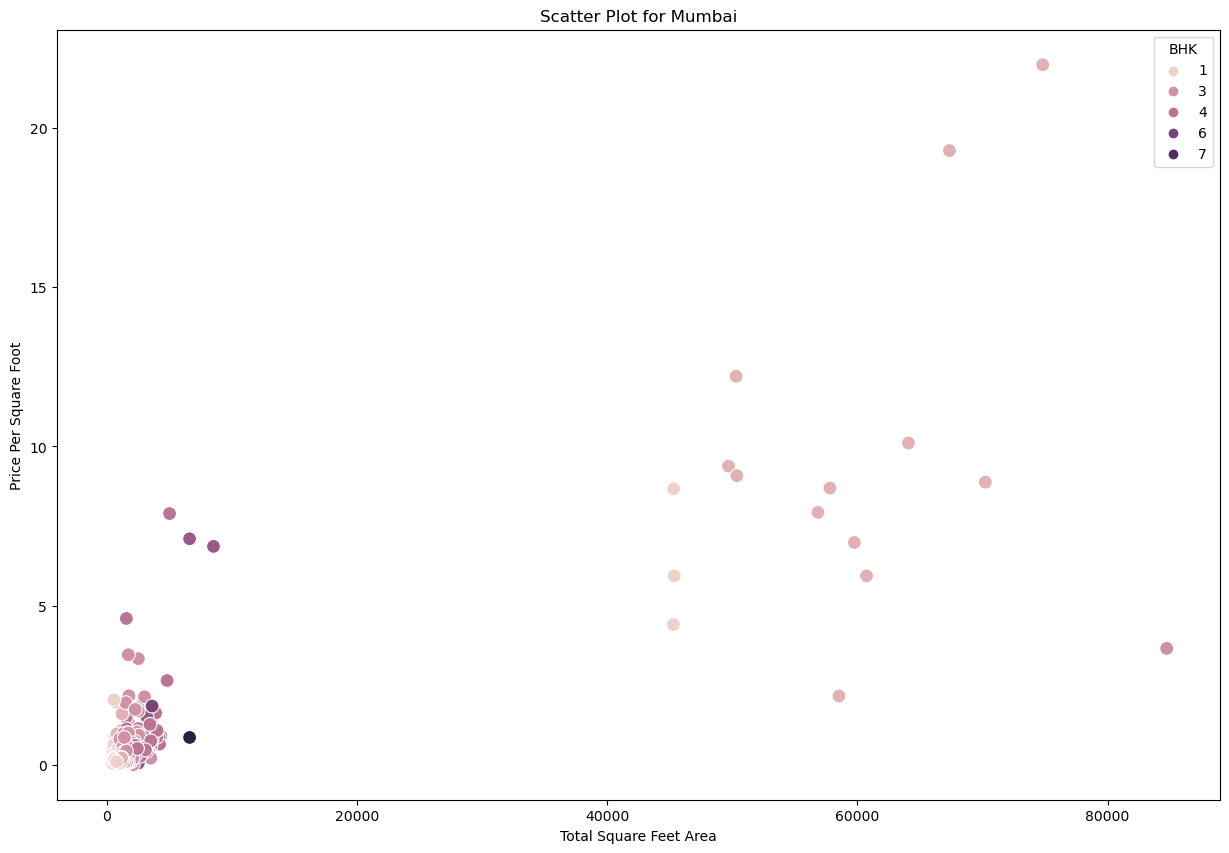

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_scatter_chart(df, location):
    plt.figure(figsize=(15, 10))
    sns.scatterplot(data=df[df['city'] == location], x='SQUARE_FT', y='Price_per_sqft', hue='BHK', s=100)
    plt.title(f'Scatter Plot for {location}')
    plt.xlabel('Total Square Feet Area')
    plt.ylabel('Price Per Square Foot')
    plt.show()

# Usage example:
plot_scatter_chart(merged_df, 'Mumbai')


In [41]:

import numpy as np

def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby("city"):  # Replace "location" with "city" if you want to group by city
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby("BHK"):  # Replace "bhk" with "BHK_NO." to match your column name
            bhk_stats[bhk] = {
                "mean": np.mean(bhk_df.Price_per_sqft),  # Replace "price_per_sqft" with your column name
                "std": np.std(bhk_df.Price_per_sqft),    # Replace "price_per_sqft" with your column name
                "count": bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby("BHK"):  # Replace "bhk" with "BHK_NO." to match your column name
            stats = bhk_stats.get(bhk - 1)
            if stats and stats['count'] > 5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.Price_per_sqft < (stats['mean'])].index.values)
    return df.drop(exclude_indices, axis="index")

# Apply the function to your merged_df
merged_df_cleaned = remove_bhk_outliers(merged_df)


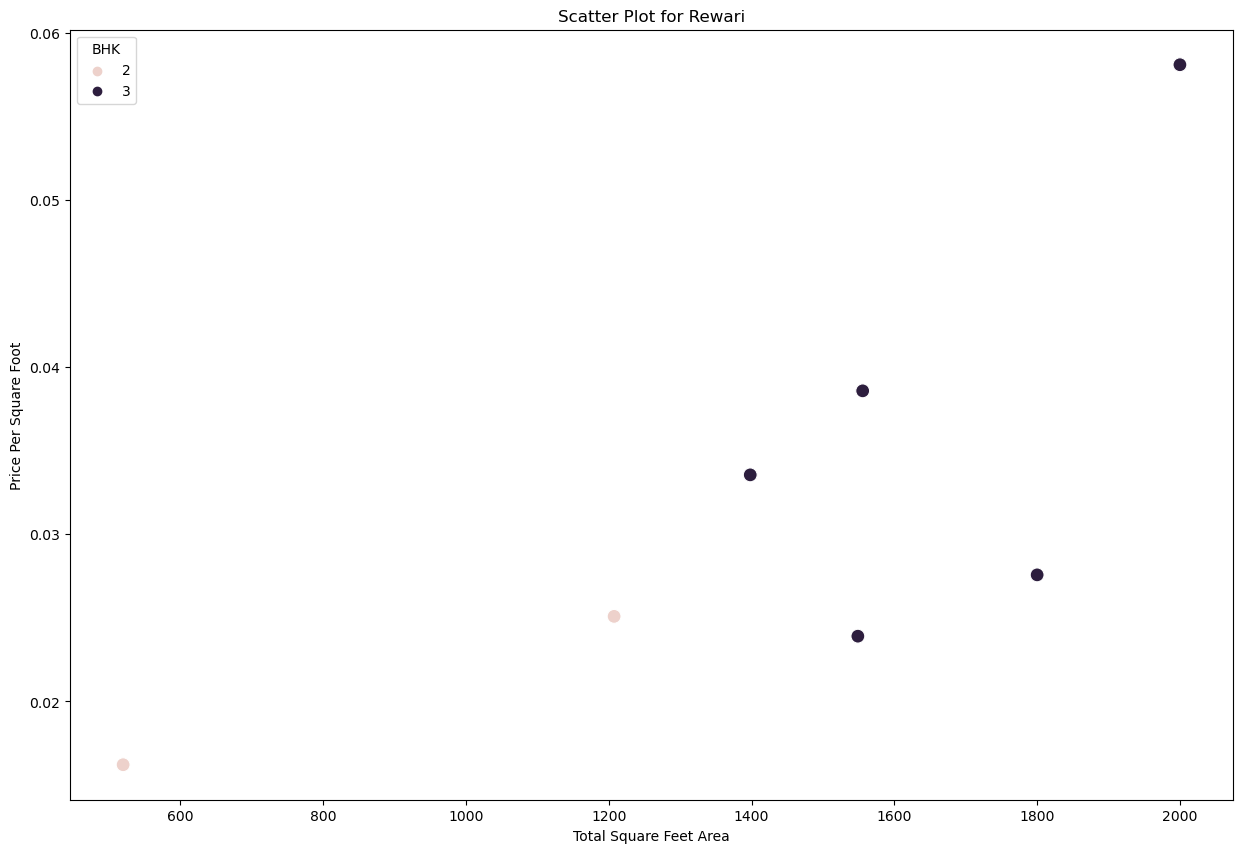

In [42]:
plot_scatter_chart(merged_df_cleaned, 'Rewari')

In [68]:
# Create X based on selected columns
X = merged_df_cleaned[[ 'SQUARE_FT', 'BHK', 'RERA', 'UNDER_CONSTRUCTION', 'Weighted_Population', 'pop2023', 'RESALE']]
y= merged_df_cleaned['TARGET(PRICE_IN_LACS)']

In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [70]:
from sklearn.linear_model import LinearRegression
lr_clf=LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.42539693868192663

In [71]:
from sklearn.model_selection import ShuffleSplit 
from sklearn.model_selection import cross_val_score
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.10022934, 0.46577435, 0.44048494, 0.39183782, 0.26703555])

In [66]:
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor

# Assuming you have extracted features (X) and the target (y) from merged_df_cleaned
X = merged_df_cleaned[[ 'SQUARE_FT', 'BHK', 'RERA', 'UNDER_CONSTRUCTION', 'Weighted_Population', 'pop2023', 'RESALE']] # Update with your target column name
y = merged_df_cleaned['TARGET(PRICE_IN_LACS)']

def find_best_model_using_gridsearchcv(X, y):
    algos = {
        'linear_regression': {
            'model': LinearRegression(),
            "params": {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            "params": {
                'alpha': [1, 2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['mse', 'friedman_mse'],
                'splitter': ['best', 'random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X, y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })
    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

# Call the function with the cleaned data
result = find_best_model_using_gridsearchcv(X, y)
print(result)


C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_

               model  best_score  \
0  linear_regression    0.333072   
1              lasso    0.332733   
2      decision_tree    0.891459   

                                         best_params  
0                                {'normalize': True}  
1                {'alpha': 1, 'selection': 'random'}  
2  {'criterion': 'friedman_mse', 'splitter': 'ran...  


In [72]:
import pickle
with open('bangalore_home_prices_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)

In [52]:
test_data=pd.read_csv(r"C:\Users\HP\Desktop\2nd sem\project\house price prediction\with map\1\test.csv")

In [53]:
test_data

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE
0,Owner,0,0,1,BHK,545.171340,1,1,"Kamrej,Surat",21.262000,73.047700
1,Dealer,1,1,2,BHK,800.000000,0,0,"Panvel,Lalitpur",18.966114,73.148278
2,Dealer,0,0,2,BHK,1257.096513,1,1,"New Town,Kolkata",22.592200,88.484911
3,Dealer,0,0,3,BHK,1400.329489,1,1,"Kalwar Road,Jaipur",26.988300,75.584600
4,Owner,0,0,1,BHK,430.477830,1,1,"Mai Mandir,Nadiad",22.700000,72.870000
...,...,...,...,...,...,...,...,...,...,...,...
68715,Dealer,0,1,2,BHK,856.555505,1,1,"Thane West,Maharashtra",19.180000,72.963330
68716,Dealer,0,1,3,BHK,2304.147465,1,1,"Sector-66A Mohali,Mohali",30.661104,76.746082
68717,Dealer,1,1,1,BHK,33362.792750,0,0,"Balkum,Maharashtra",19.222101,72.988231
68718,Dealer,0,0,2,BHK,1173.708920,1,1,"Hadapsar,Pune",18.496670,73.941670


In [54]:
test_data["city"]=test_data["ADDRESS"].apply(lambda x:x.split(",")[-1])

In [57]:
test_data

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,city
0,Owner,0,0,1,BHK,545.171340,1,1,"Kamrej,Surat",21.262000,73.047700,Surat
1,Dealer,1,1,2,BHK,800.000000,0,0,"Panvel,Lalitpur",18.966114,73.148278,Lalitpur
2,Dealer,0,0,2,BHK,1257.096513,1,1,"New Town,Kolkata",22.592200,88.484911,Kolkata
3,Dealer,0,0,3,BHK,1400.329489,1,1,"Kalwar Road,Jaipur",26.988300,75.584600,Jaipur
4,Owner,0,0,1,BHK,430.477830,1,1,"Mai Mandir,Nadiad",22.700000,72.870000,Nadiad
...,...,...,...,...,...,...,...,...,...,...,...,...
68715,Dealer,0,1,2,BHK,856.555505,1,1,"Thane West,Maharashtra",19.180000,72.963330,Maharashtra
68716,Dealer,0,1,3,BHK,2304.147465,1,1,"Sector-66A Mohali,Mohali",30.661104,76.746082,Mohali
68717,Dealer,1,1,1,BHK,33362.792750,0,0,"Balkum,Maharashtra",19.222101,72.988231,Maharashtra
68718,Dealer,0,0,2,BHK,1173.708920,1,1,"Hadapsar,Pune",18.496670,73.941670,Pune


In [56]:
test_data=test_data.rename(columns={"BHK_NO.":"BHK"})

In [50]:
test_data= test_data['BHK_OR_RK'].replace({'BHK': 1, 'RK': 0}) 


In [58]:
merged_test = test_data.merge(city_centers, on='city', how='inner')

In [59]:
merged_test['BHK_OR_RK']= merged_test['BHK_OR_RK'].replace({'BHK': 1, 'RK': 0}) 

In [60]:
merged_test

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,city,pop2023,city_lattitude,city_longitude
0,Owner,0,0,1,1,545.171340,1,1,"Kamrej,Surat",21.262000,73.047700,Surat,2894504,21.1959,72.8302
1,Owner,0,0,2,1,1248.000000,1,1,"Palanpur,Surat",21.170000,72.830000,Surat,2894504,21.1959,72.8302
2,Dealer,1,1,3,1,1804.949054,0,1,"Bhimrad,Surat",21.123590,72.804292,Surat,2894504,21.1959,72.8302
3,Owner,0,0,1,1,629.825274,1,1,"Amroli,Surat",21.239940,72.856520,Surat,2894504,21.1959,72.8302
4,Owner,0,0,2,1,924.784217,1,1,"Bhimrad,Surat",21.123590,72.804292,Surat,2894504,21.1959,72.8302
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50629,Owner,0,0,20,1,107913.669100,1,1,"Rajbagh,Srinagar",34.065387,74.825425,Srinagar,975857,34.0857,74.8055
50630,Owner,0,0,1,1,539.956803,1,1,"Dinesh Nagar,Hapur",27.559692,78.644546,Hapur,242920,28.7299,77.7807
50631,Owner,0,0,2,1,1200.218221,1,1,"telephone exchange road,Patan",23.830000,72.120000,Patan,117863,23.8507,72.1296
50632,Owner,0,0,1,1,440.087146,1,1,"R. M. Colony, Housing Board,Dindigul",10.314642,76.955645,Dindigul,200797,10.3690,77.9804


In [62]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
merged_test['Weighted_Population'] = scaler.fit_transform(merged_test[['pop2023']])


In [67]:
X = merged_test[[ 'SQUARE_FT', 'BHK', 'RERA', 'UNDER_CONSTRUCTION', 'Weighted_Population', 'pop2023', 'RESALE']]


In [ ]:
import pickle
with open('bangalore_home_prices_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)

In [74]:
# Load the trained model (replace 'your_model.pkl' with the actual filename)
import pickle

with open('bangalore_home_prices_model.pickle', 'rb') as model_file:
    model = pickle.load(model_file)

# Prepare your test data
X_test = merged_test[['SQUARE_FT', 'BHK', 'RERA', 'UNDER_CONSTRUCTION', 'Weighted_Population', 'pop2023', 'RESALE']]

# Make predictions
predictions = model.predict(X_test)

# The 'predictions' variable now contains the predicted prices for your test data
print(predictions)


[-24.96387759  74.89580201 171.96009877 ...  35.07615347 -64.9902804
  34.62428474]
